# k4me1 20 vs 20 signal in peaks processing

Pipeline for the input files:
* Diffbind
* Remove duplicates from BAM files
* Launch script `scripts/peaks_signal.sh` 

```

# cd <UNIQUE_BAMS_FOLDER>
cd /scratch/artyomov_lab_aging/Y2020/chipseq/processed/k4me1/k4me1_20vs20_reseq_bams_unique

# MACS2 --broad 0.1 peaks union
bash ~/work/washu/scripts/peaks_signals.sh $(pwd) 150 ../k4me1_20vs20_reseq_bams_peaks_union/YO_macs_broad_0.1.bed YO_macs_broad_0.1 | tee log.txt

# Sicer 0.01 union
bash ~/work/washu/scripts/peaks_signals.sh $(pwd) 150 ../k4me1_20vs20_reseq_bams_peaks_union/YO_sicer_0.01.bed YO_sicer_0.01 | tee log.txt

```


In [37]:
import pandas as pd
import numpy as np

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.lda import LDA
from sklearn.manifold import MDS

import re

def signal_pca(signal, title):
    pca = PCA(n_components=2)
    signal_r = pca.fit_transform(signal)
    print('explained variance ratio: {}'.format(pca.explained_variance_ratio_))

    ODS=np.asarray([n.startswith('OD') for n in signal.index])
    YDS=np.asarray([n.startswith('YD') for n in signal.index])

    plt.figure(figsize=(7, 7))
    plt.scatter(signal_r[YDS, 0], signal_r[YDS, 1] , color='red', alpha=.8, label='YD')
    plt.scatter(signal_r[ODS, 0], signal_r[ODS, 1] , color='blue', alpha=.8, label='OD')
    for label, x, y in zip([re.sub('_R1.*', '', l) for l in signal.index], signal_r[:, 0], signal_r[:, 1]):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points', ha='right', va='bottom')
    plt.title(title)
    plt.show()

# DiffBIND counts using \_macs_broad_0.1 peaks

explained variance ratio: [ 0.50154695  0.17692174]


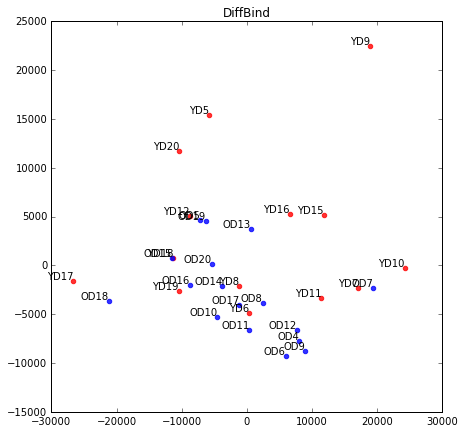

explained variance ratio: [ 0.21034313  0.10868945]


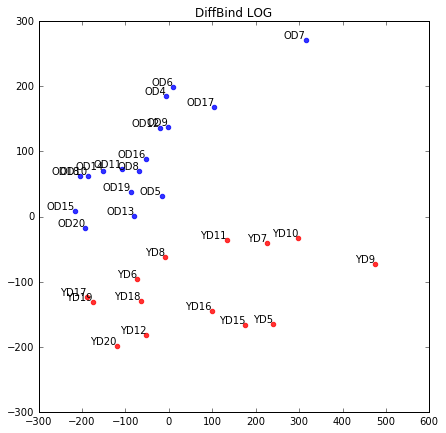

In [39]:
FOLDER='/Volumes/WD/scratch/artyomov_lab_aging/Y20O20/chipseq/processed/k4me1/k4me1_diff/k4me1_diffbind_ok/'
signal_df = pd.read_csv(FOLDER + 'k4me1_counts.csv')
signal = signal_df.drop(['seqnames', 'start', 'end', 'width', 'strand'], axis=1).transpose()
signal_pca(signal, 'DiffBind')
signal_pca(signal.applymap(lambda x: np.log2(1+x)), 'DiffBind LOG')

# YO_macs_broad_0.1 peaks

explained variance ratio: [ 0.91782402  0.02861188]


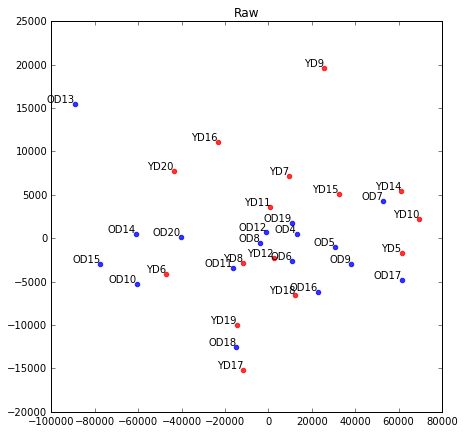

explained variance ratio: [ 0.24119196  0.18287563]


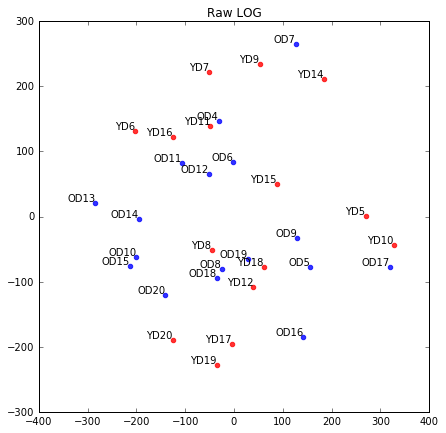

In [40]:
FOLDER='/Volumes/WD/scratch/artyomov_lab_aging/Y20O20/chipseq/processed/k4me1/k4me1_20vs20_reseq_bams_unique/coverages/YO_macs_broad_0.1/'
signal_df = pd.read_csv(FOLDER + 'YO_macs_broad_0.1_raw.csv')
signal = signal_df.drop(['chr', 'start', 'end', 'OD_input_unique', 'YD_input_unique'], axis=1).transpose()
signal_pca(signal, 'Raw')
signal_pca(signal.applymap(lambda x: np.log2(1+x)), 'Raw LOG')
# signal_mds(signal, 'Raw')
# signal_lda(signal, 'Raw')

explained variance ratio: [ 0.90156165  0.03443748]


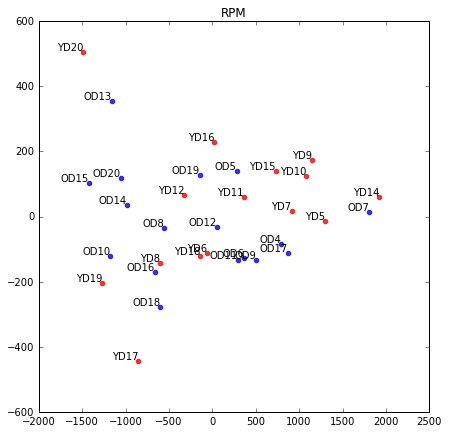

explained variance ratio: [ 0.59962892  0.05077985]


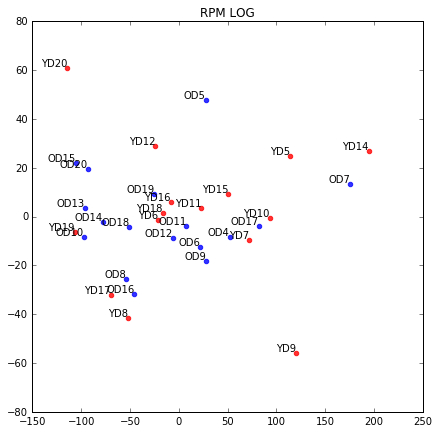

In [41]:
signal_df = pd.read_csv(FOLDER + 'YO_macs_broad_0.1_rpm.csv')
signal = signal_df.drop(['chr', 'start', 'end', 'OD_input_unique', 'YD_input_unique'], axis=1).transpose()
signal_pca(signal, 'RPM')
signal_pca(signal.applymap(lambda x: np.log2(1+x)), 'RPM LOG')
# signal_mds(signal, 'By mln')
# signal_lda(signal, 'By mln')

explained variance ratio: [ 0.52135577  0.13387793]


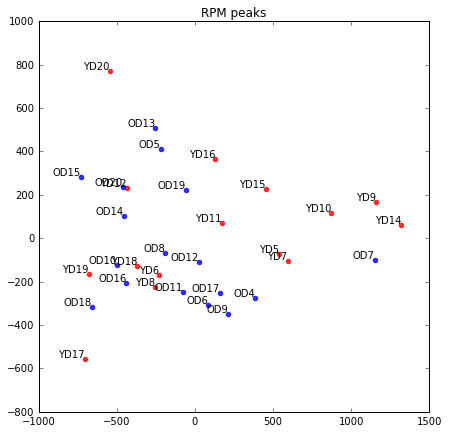

explained variance ratio: [ 0.38774347  0.06492683]


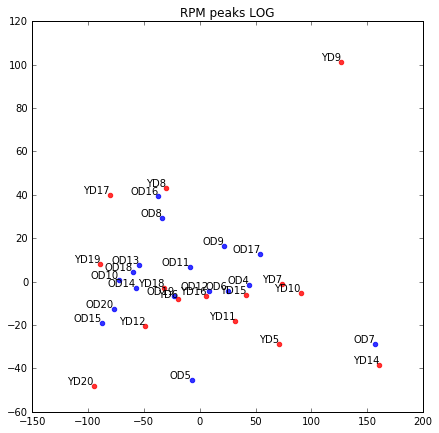

In [42]:
signal_df = pd.read_csv(FOLDER + 'YO_macs_broad_0.1_rpm_peaks.csv')
signal = signal_df.drop(['chr', 'start', 'end', 'OD_input_unique', 'YD_input_unique'], axis=1).transpose()
signal_pca(signal, 'RPM peaks')
signal_pca(signal.applymap(lambda x: np.log2(1+x)), 'RPM peaks LOG')
# signal_mds(signal, 'By peaks mln')
# signal_lda(signal, 'By peaks mln')

explained variance ratio: [ 0.5306152   0.05377491]


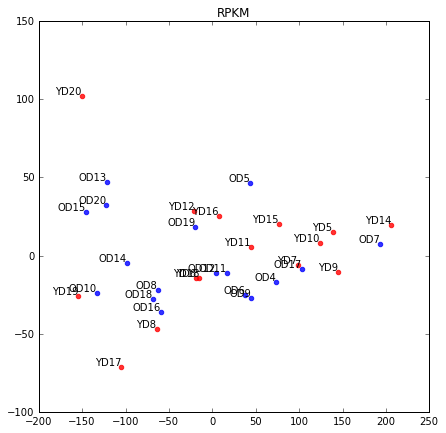

explained variance ratio: [ 0.37913315  0.04912753]


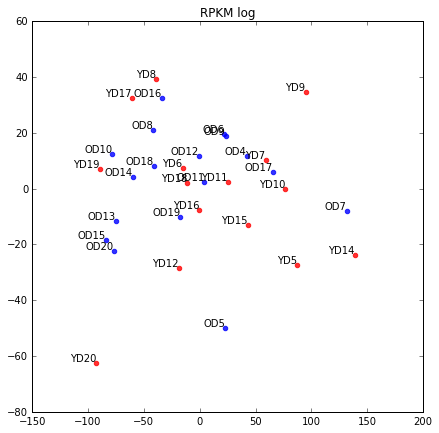

In [43]:
signal_df = pd.read_csv(FOLDER + 'YO_macs_broad_0.1_rpkm.csv')
signal = signal_df.drop(['chr', 'start', 'end', 'OD_input_unique', 'YD_input_unique'], axis=1).transpose()
signal_pca(signal, 'RPKM')
signal_pca(signal.applymap(lambda x: np.log2(1+x)), 'RPKM log')
# signal_mds(signal, 'RPKM')
# signal_lda(signal, 'RPKM')

# YO_sicer_0.01 peaks

explained variance ratio: [ 0.91610443  0.02979372]


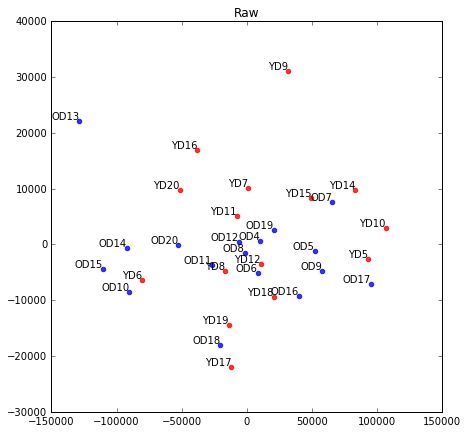

explained variance ratio: [ 0.47156103  0.181774  ]


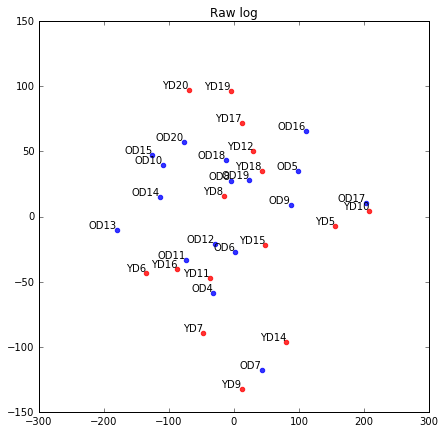

In [44]:
FOLDER='/Volumes/WD/scratch/artyomov_lab_aging/Y20O20/chipseq/processed/k4me1/k4me1_20vs20_reseq_bams_unique/coverages/YO_sicer_0.01/'
signal_df = pd.read_csv(FOLDER + 'YO_sicer_0.01_raw.csv')
signal = signal_df.drop(['chr', 'start', 'end', 'OD_input_unique', 'YD_input_unique'], axis=1).transpose()
signal_pca(signal, 'Raw')
signal_pca(signal.applymap(lambda x: np.log2(1+x)), 'Raw log')
# signal_mds(signal, 'Raw')
# signal_lda(signal, 'Raw')

explained variance ratio: [ 0.89799537  0.0406165 ]


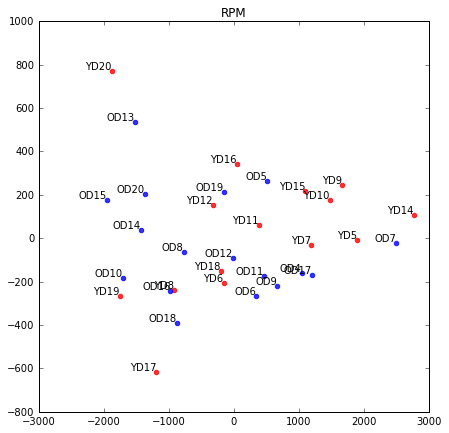

explained variance ratio: [ 0.55753946  0.06479773]


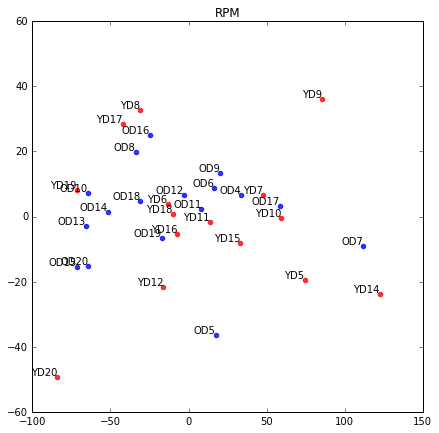

In [45]:
signal_df = pd.read_csv(FOLDER + 'YO_sicer_0.01_rpm.csv')
signal = signal_df.drop(['chr', 'start', 'end', 'OD_input_unique', 'YD_input_unique'], axis=1).transpose()
signal_pca(signal, 'RPM')
signal_pca(signal.applymap(lambda x: np.log2(1+x)), 'RPM')
# signal_mds(signal, 'By mln')
# signal_lda(signal, 'By mln')

explained variance ratio: [ 0.5602176   0.15618952]


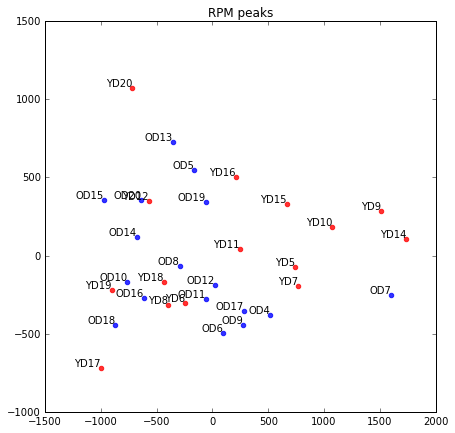

explained variance ratio: [ 0.4729561   0.07024373]


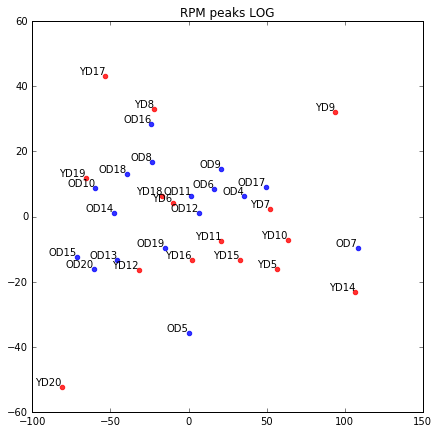

In [46]:
signal_df = pd.read_csv(FOLDER + 'YO_sicer_0.01_rpm_peaks.csv')
signal = signal_df.drop(['chr', 'start', 'end', 'OD_input_unique', 'YD_input_unique'], axis=1).transpose()
signal_pca(signal, 'RPM peaks')
signal_pca(signal.applymap(lambda x: np.log2(1+x)), 'RPM peaks LOG')
# signal_mds(signal, 'By peaks mln')
# signal_lda(signal, 'By peaks mln')

explained variance ratio: [ 0.5942911   0.07094988]


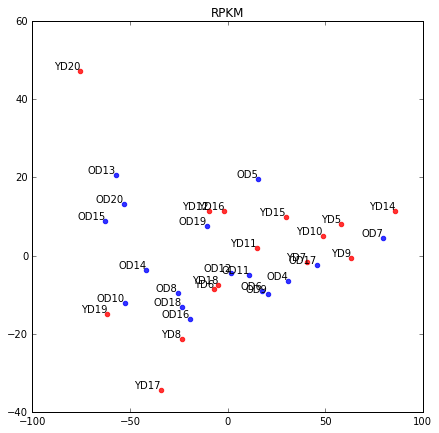

explained variance ratio: [ 0.52919679  0.06731129]


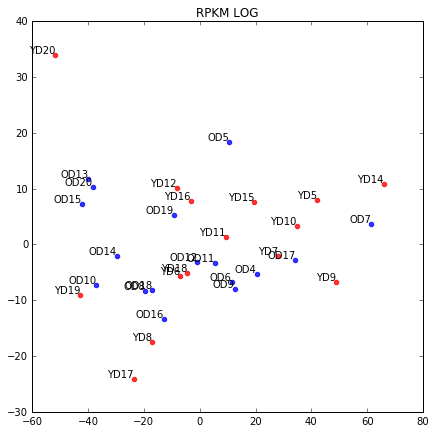

In [47]:
signal_df = pd.read_csv(FOLDER + 'YO_sicer_0.01_rpkm.csv')
signal = signal_df.drop(['chr', 'start', 'end', 'OD_input_unique', 'YD_input_unique'], axis=1).transpose()
signal_pca(signal, 'RPKM')
signal_pca(signal.applymap(lambda x: np.log2(1+x)), 'RPKM LOG')
# signal_mds(signal, 'RPKM')
# signal_lda(signal, 'RPKM')

# Counts in SICER peaks

In [50]:
import re
from numpy import argmin
from numpy import mean
from numpy import log2
from scipy.stats import mannwhitneyu 

FOLDER='/Volumes/WD/scratch/artyomov_lab_aging/Y20O20/chipseq/processed/k4me1/k4me1_20vs20_reseq_bams_unique/coverages/YO_sicer_0.01/'
df = pd.read_csv(FOLDER + 'YO_sicer_0.01_rpm.csv')
ODS=[c for c in df.columns if re.match('OD\\d+.*', c)]
print('ODS {}'.format(ODS))
YDS=[c for c in df.columns if re.match('YD\\d+.*', c) and not re.match('YD14.*', c)]
print('YDS {}'.format(YDS))

def test(X, Y):
        try:
            return mannwhitneyu(X, Y).pvalue
        except:
            return 1.0
            
pvals = [test(row[ODS], row[YDS]) for _,row in df.iterrows()]
print('Min Pvalue: {}'.format(min(pvals)))
row = df.iloc[argmin(pvals)]
print('{}:{}-{}'.format(row['chr'], row['start'], row['end']))
print('ODS: {}'.format(row[ODS].values))
print('YDS: {}'.format(row[YDS].values))
print('ODS mean: {}'.format(mean(row[ODS].values)))
print('YDS mean: {}'.format(mean(row[YDS].values)))
print('log2FC OD/YD: {}'.format(log2(mean(row[ODS].values/mean(row[YDS].values)))))

ODS ['OD10_R1_hg19_unique', 'OD11_R1_hg19_unique', 'OD12_R1_hg19_unique', 'OD13_R1_hg19_unique', 'OD14_R1_hg19_unique', 'OD15_R1_hg19_unique', 'OD16_R1_hg19_unique', 'OD17_R1_hg19_unique', 'OD18_R1_hg19_unique', 'OD19_R1_hg19_unique', 'OD20_R1_hg19_unique', 'OD4_R1_hg19_unique', 'OD5_R1_hg19_unique', 'OD6_R1_hg19_unique', 'OD7_R1_hg19_unique', 'OD8_R1_hg19_unique', 'OD9_R1_hg19_unique']
YDS ['YD10_R1_hg19_unique', 'YD11_R1_hg19_unique', 'YD12_R1_hg19_unique', 'YD15_R1_hg19_unique', 'YD16_R1_hg19_unique', 'YD17_R1_hg19_unique', 'YD18_R1_hg19_unique', 'YD19_R1_hg19_unique', 'YD20_R1_hg19_unique', 'YD5_R1_hg19_unique', 'YD6_R1_hg19_unique', 'YD7_R1_hg19_unique', 'YD8_R1_hg19_unique', 'YD9_R1_hg19_unique']
Min Pvalue: 7.508232891632324e-05
chr12:90629400-90630799
ODS: [1.2536828778187217 0.78943687844728994 1.085141470158133
 0.72459885674497326 1.2715295561040871 0.90270273236476961
 0.82475227681702645 0.93862954532823939 0.93492812428401861
 0.98753429289983219 0.80457709965993474 0.975

# Counts MACS2 --broad 0.1

In [51]:
FOLDER='/Volumes/WD/scratch/artyomov_lab_aging/Y20O20/chipseq/processed/k4me1/k4me1_20vs20_reseq_bams_unique/coverages/YO_macs_broad_0.1/'
df = pd.read_csv(FOLDER + 'YO_macs_broad_0.1_rpm.csv')
ODS=[c for c in df.columns if re.match('OD\\d+.*', c)]
print('ODS {}'.format(ODS))
YDS=[c for c in df.columns if re.match('YD\\d+.*', c) and not re.match('YD14.*', c)]
print('YDS {}'.format(YDS))

pvals = [test(row[ODS], row[YDS]) for _,row in df.iterrows()]
print('Min Pvalue: {}'.format(min(pvals)))
row = df.iloc[argmin(pvals)]
print('{}:{}-{}'.format(row['chr'], row['start'], row['end']))
print('ODS: {}'.format(row[ODS].values))
print('YDS: {}'.format(row[YDS].values))
print('ODS mean: {}'.format(mean(row[ODS].values)))
print('YDS mean: {}'.format(mean(row[YDS].values)))
print('log2FC OD/YD: {}'.format(log2(mean(row[ODS].values/mean(row[YDS].values)))))

ODS ['OD10_R1_hg19_unique', 'OD11_R1_hg19_unique', 'OD12_R1_hg19_unique', 'OD13_R1_hg19_unique', 'OD14_R1_hg19_unique', 'OD15_R1_hg19_unique', 'OD16_R1_hg19_unique', 'OD17_R1_hg19_unique', 'OD18_R1_hg19_unique', 'OD19_R1_hg19_unique', 'OD20_R1_hg19_unique', 'OD4_R1_hg19_unique', 'OD5_R1_hg19_unique', 'OD6_R1_hg19_unique', 'OD7_R1_hg19_unique', 'OD8_R1_hg19_unique', 'OD9_R1_hg19_unique']
YDS ['YD10_R1_hg19_unique', 'YD11_R1_hg19_unique', 'YD12_R1_hg19_unique', 'YD15_R1_hg19_unique', 'YD16_R1_hg19_unique', 'YD17_R1_hg19_unique', 'YD18_R1_hg19_unique', 'YD19_R1_hg19_unique', 'YD20_R1_hg19_unique', 'YD5_R1_hg19_unique', 'YD6_R1_hg19_unique', 'YD7_R1_hg19_unique', 'YD8_R1_hg19_unique', 'YD9_R1_hg19_unique']
Min Pvalue: 2.80118070800271e-05
chr5:172063736-172065297
ODS: [1.91739734254628 2.21480902008823 1.8791474239323769 2.3016669567193269
 2.5195122685766167 1.8766714699162319 1.6887784715777208
 1.2906156248263292 3.85303711826141 2.6848588588214191 2.7355621388437785
 2.183051111659557 